In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
Train_data=pd.read_csv("Train_Data_Restaurant.csv",sep='\t')         # Loading dataset
Test_data=pd.read_csv("Test_Data_Restaurant.csv",sep='\t')

In [3]:
Train_data.head()          # Checking Train data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
Test_data.head()        # Checking Test data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
Train_data.shape         # Checking shape

(12690, 9)

In [6]:
Test_data.shape          # Checking shape

(4231, 8)

In [7]:
Train_data.dtypes       # Checking Train datatypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [8]:
Test_data.dtypes      # Checking Test datatypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [9]:
Train_data.info()       # Checking Train Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [10]:
Test_data.info()           # Checking Test info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [11]:
Train_data.isnull().sum()          # Checking null values in Train data

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [12]:
list=['CITY','LOCALITY','RATING','VOTES']             # Imputing Null values in train data.
for i in list:
    Train_data[i].fillna(Train_data[i].mode,inplace=True)

In [13]:
Train_data.isnull().sum()                      # Checking null values in Train data

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [14]:
Test_data.isnull().sum()                 # Checking null values in Test data

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [15]:
list=['CITY','LOCALITY','RATING','VOTES']     # Imputing Null values in test data.
for i in list:
    Test_data[i].fillna(Test_data[i].mode,inplace=True)

In [16]:
Test_data.isnull().sum()                   # Checking null values in Test data

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [17]:
Train_data['CITY'].nunique           # Checking unique values for CITY.

<bound method IndexOpsMixin.nunique of 0              Thane
1            Chennai
2            Chennai
3             Mumbai
4             Mumbai
            ...     
12685      Hyderabad
12686         Mumbai
12687    Navi Mumbai
12688        Chennai
12689      Hyderabad
Name: CITY, Length: 12690, dtype: object>

In [18]:
Train_data['LOCALITY'].nunique                   # Checking Unique count for locality

<bound method IndexOpsMixin.nunique of 0              Dombivali East
1                   Ramapuram
2                  Saligramam
3                 Bandra West
4                 Lower Parel
                 ...         
12685              Gachibowli
12686    Bandra Kurla Complex
12687                   Vashi
12688             Maduravoyal
12689         Vanasthalipuram
Name: LOCALITY, Length: 12690, dtype: object>

In [19]:
from sklearn.preprocessing import LabelEncoder       # converting string data to numeric using LabelEncoder in Train data
le=LabelEncoder()
Train_data['TITLE']=le.fit_transform(Train_data['TITLE'])
Train_data['CUISINES']=le.fit_transform(Train_data['CUISINES'])
Train_data['TIME']=le.fit_transform(Train_data['TIME'])

In [20]:
Train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,Thane,Dombivali East,3.6,49 votes,1200
1,33,13198,289,1885,Chennai,Ramapuram,4.2,30 votes,1500
2,31,10915,2976,661,Chennai,Saligramam,3.8,221 votes,800
3,95,6346,4130,275,Mumbai,Bandra West,4.1,24 votes,800
4,50,15387,1766,615,Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,95,13228,2934,1144,Hyderabad,Gachibowli,3.8,546 votes,500
12686,33,9686,2143,1177,Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,71,11133,2088,1137,Navi Mumbai,Vashi,4.0,608 votes,1300
12688,31,6134,3506,1837,Chennai,Maduravoyal,3.5,32 votes,400


In [21]:
from sklearn.preprocessing import LabelEncoder       # converting string data to numeric using LabelEncoder in Test data
le=LabelEncoder()
Test_data['TITLE']=le.fit_transform(Test_data['TITLE'])
Test_data['CUISINES']=le.fit_transform(Test_data['CUISINES'])
Test_data['TIME']=le.fit_transform(Test_data['TIME'])

In [22]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,503,Noida,Sector 18,4.3,564 votes
1,75,12680,1632,933,Mumbai,Grant Road,4.2,61 votes
2,23,1411,1455,219,Mumbai,Marine Lines,3.8,350 votes
3,66,204,208,1071,Faridabad,NIT,3.8,1445 votes
4,75,13453,1637,208,Kochi,Kaloor,3.6,23 votes


In [23]:
Train_data['source']='train'         #Adding source with train and test into both Train & Test data
Test_data['source']='test'
data=pd.concat([Train_data,Test_data],sort=False)
print(Train_data.shape,Test_data.shape,data.shape)

(12690, 10) (4231, 9) (16921, 10)


In [24]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,31,9438,2627,739,Thane,Dombivali East,3.6,49 votes,1200.0,train
1,33,13198,289,1885,Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,31,10915,2976,661,Chennai,Saligramam,3.8,221 votes,800.0,train
3,95,6346,4130,275,Mumbai,Bandra West,4.1,24 votes,800.0,train
4,50,15387,1766,615,Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [25]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
source              0
dtype: int64

In [26]:
data['COST'].fillna(data['COST'].mean(),inplace=True)           # Imputing Null values with mean

In [27]:
data['source']=le.fit_transform(data['source'])       # Converting string to numeric

In [28]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,31,9438,2627,739,Thane,Dombivali East,3.6,49 votes,1200.0,1
1,33,13198,289,1885,Chennai,Ramapuram,4.2,30 votes,1500.0,1
2,31,10915,2976,661,Chennai,Saligramam,3.8,221 votes,800.0,1
3,95,6346,4130,275,Mumbai,Bandra West,4.1,24 votes,800.0,1
4,50,15387,1766,615,Mumbai,Lower Parel,3.8,165 votes,300.0,1


In [29]:
data['CITY']=le.fit_transform(data['CITY'].astype(str))   # Converting string to numeric


In [30]:
data['LOCALITY']=le.fit_transform(data['LOCALITY'].astype(str))    # Converting string to numeric

In [31]:
data.isnull().sum()                 # Checking Null values

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
source           0
dtype: int64

In [32]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,31,9438,2627,739,402,330,3.6,49 votes,1200.0,1
1,33,13198,289,1885,77,1216,4.2,30 votes,1500.0,1
2,31,10915,2976,661,77,1274,3.8,221 votes,800.0,1
3,95,6346,4130,275,279,163,4.1,24 votes,800.0,1
4,50,15387,1766,615,279,711,3.8,165 votes,300.0,1


In [33]:
data['RATING'] = data['RATING'].str.replace('NEW', '1')         # replacing string value with numeric
data['RATING'] = data['RATING'].str.replace('-', '1').astype(float)  # replacing '-' with numeric

In [34]:
data['VOTES'] = data['VOTES'].str.replace(' votes', '').astype(float)     # replacing string value 

In [35]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,31,9438,2627,739,402,330,3.6,49.0,1200.0,1
1,33,13198,289,1885,77,1216,4.2,30.0,1500.0,1
2,31,10915,2976,661,77,1274,3.8,221.0,800.0,1
3,95,6346,4130,275,279,163,4.1,24.0,800.0,1
4,50,15387,1766,615,279,711,3.8,165.0,300.0,1


In [36]:
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,31,9438,2627,739,402,330,3.6,49.0,1200.000000,1
1,33,13198,289,1885,77,1216,4.2,30.0,1500.000000,1
2,31,10915,2976,661,77,1274,3.8,221.0,800.000000,1
3,95,6346,4130,275,279,163,4.1,24.0,800.000000,1
4,50,15387,1766,615,279,711,3.8,165.0,300.000000,1
...,...,...,...,...,...,...,...,...,...,...
4226,23,9057,1425,103,318,1186,3.9,287.0,655.252246,0
4227,66,1247,267,262,44,463,4.3,469.0,655.252246,0
4228,75,8617,679,1052,130,1372,3.7,53.0,655.252246,0
4229,75,6485,1541,215,218,644,1.0,NaN,655.252246,0


In [37]:
data.describe()           # Checking Statistical description

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16917.000000,15315.000000,16921.000000,16921.000000
mean,56.044087,7767.211631,1908.430648,1015.813604,176.377755,751.393653,3.520790,419.194254,655.252246,0.749956
std,31.850379,4493.287626,1212.302948,732.670071,107.598087,461.905119,0.910054,839.915407,542.979598,0.433051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,20.000000,0.000000
25%,31.000000,3873.000000,849.000000,478.000000,77.000000,383.000000,3.400000,57.000000,350.000000,0.000000
50%,50.000000,7751.000000,1694.000000,843.000000,162.000000,668.000000,3.800000,164.000000,600.000000,1.000000
75%,95.000000,11672.000000,2946.000000,1528.000000,279.000000,1173.000000,4.000000,462.000000,655.252246,1.000000
max,112.000000,15573.000000,4154.000000,2688.000000,451.000000,1637.000000,4.900000,41186.000000,14000.000000,1.000000


Observations: TITLE  Maximum-112, Minimum-0
              RESTAURANT_ID Maximum-15573, Minimum-0
              CUISINES Maximum-4154, Minimum-0
              TIME Maximum-2688, Minimum-0
              CITY Maximum-451, Minimum-0
              LOCALITY Maximum-1637, Minimum-0
              RATING Maximum-4.9, Minimum-1
              VOTES Maximum-41186, Minimum-3
              COST Maximum-14000, Minimum-20
        

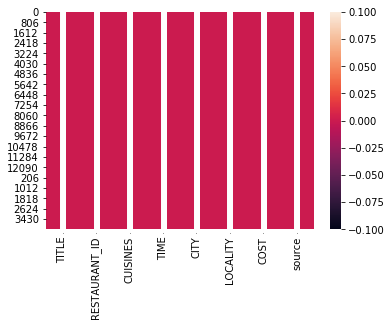

In [91]:
import seaborn as sns
sns.heatmap(data.isnull(),annot=True)

In [39]:
data['COST'].value_counts()          # Checking count for COST

655.252246      4231
300.000000      1595
400.000000      1357
500.000000      1300
200.000000      1031
                ... 
4050.000000        1
5200.000000        1
14000.000000       1
3600.000000        1
140.000000         1
Name: COST, Length: 87, dtype: int64

In [40]:
data.dtypes            # Checking  data types

TITLE              int32
RESTAURANT_ID      int64
CUISINES           int32
TIME               int32
CITY               int32
LOCALITY           int32
RATING           float64
VOTES            float64
COST             float64
source             int32
dtype: object

In [41]:
data.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16917.000000,15315.000000,16921.000000,16921.000000
mean,56.044087,7767.211631,1908.430648,1015.813604,176.377755,751.393653,3.520790,419.194254,655.252246,0.749956
std,31.850379,4493.287626,1212.302948,732.670071,107.598087,461.905119,0.910054,839.915407,542.979598,0.433051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,20.000000,0.000000
25%,31.000000,3873.000000,849.000000,478.000000,77.000000,383.000000,3.400000,57.000000,350.000000,0.000000
50%,50.000000,7751.000000,1694.000000,843.000000,162.000000,668.000000,3.800000,164.000000,600.000000,1.000000
75%,95.000000,11672.000000,2946.000000,1528.000000,279.000000,1173.000000,4.000000,462.000000,655.252246,1.000000
max,112.000000,15573.000000,4154.000000,2688.000000,451.000000,1637.000000,4.900000,41186.000000,14000.000000,1.000000


Observations:  TITLE Maximum-112 Minimum-0
               RESTAURANT_ID Maximum-15573 Minimum-0
               CUISINES Maximum-4154 Minimum-0
               CITY Maximum-451 Minimum-0
               LOCALITY Maximum-1637 Minimum-0
               RATING Maximum-2.21 Minimum-1
               VOTES  Maximum-34.53 Minimum-1
               COST Maximum-24.10 Minimum-2.71

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data.corr()       # Checking Statistical Description

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,COST,source
TITLE,1.000000,-0.000412,0.296237,0.120275,-0.019674,0.025669,-0.367780,0.186055
RESTAURANT_ID,-0.000412,1.000000,0.045859,0.005870,0.001796,-0.004591,0.038828,-0.003113
CUISINES,0.296237,0.045859,1.000000,0.266934,0.017753,0.016352,-0.119502,0.466814
TIME,0.120275,0.005870,0.266934,1.000000,-0.005901,-0.007233,-0.107957,0.388305
CITY,-0.019674,0.001796,0.017753,-0.005901,1.000000,0.053234,0.042606,-0.004350
LOCALITY,0.025669,-0.004591,0.016352,-0.007233,0.053234,1.000000,-0.013902,0.003068
COST,-0.367780,0.038828,-0.119502,-0.107957,0.042606,-0.013902,1.000000,-0.174454
source,0.186055,-0.003113,0.466814,0.388305,-0.004350,0.003068,-0.174454,1.000000


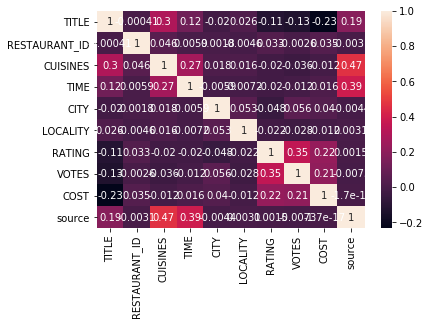

In [43]:
sns.heatmap(data.corr(),annot=True)   # Checking correlation using heatmap--All features correlated with target variable

Univariate Analysis

655.252246      4231
300.000000      1595
400.000000      1357
500.000000      1300
200.000000      1031
                ... 
4050.000000        1
5200.000000        1
14000.000000       1
3600.000000        1
140.000000         1
Name: COST, Length: 87, dtype: int64


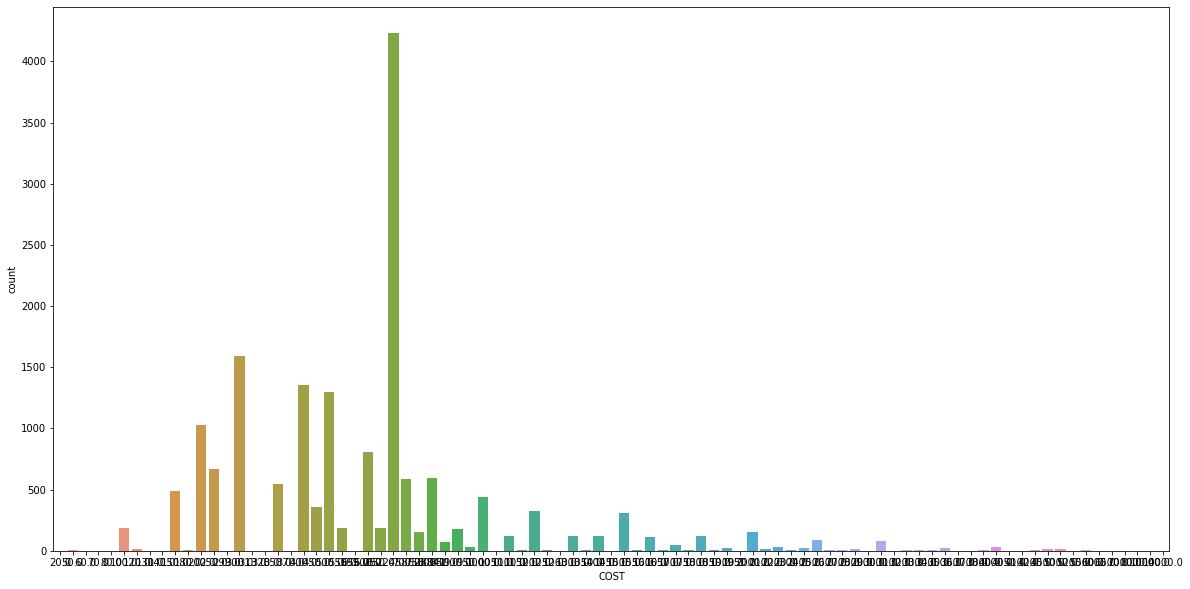

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(x='COST',data=data)      # 655 has maximum count for cost
print(data.COST.value_counts())

77     2855
44     2835
162    2458
279    2311
318    1754
       ... 
26        1
58        1
74        1
106       1
0         1
Name: CITY, Length: 452, dtype: int64


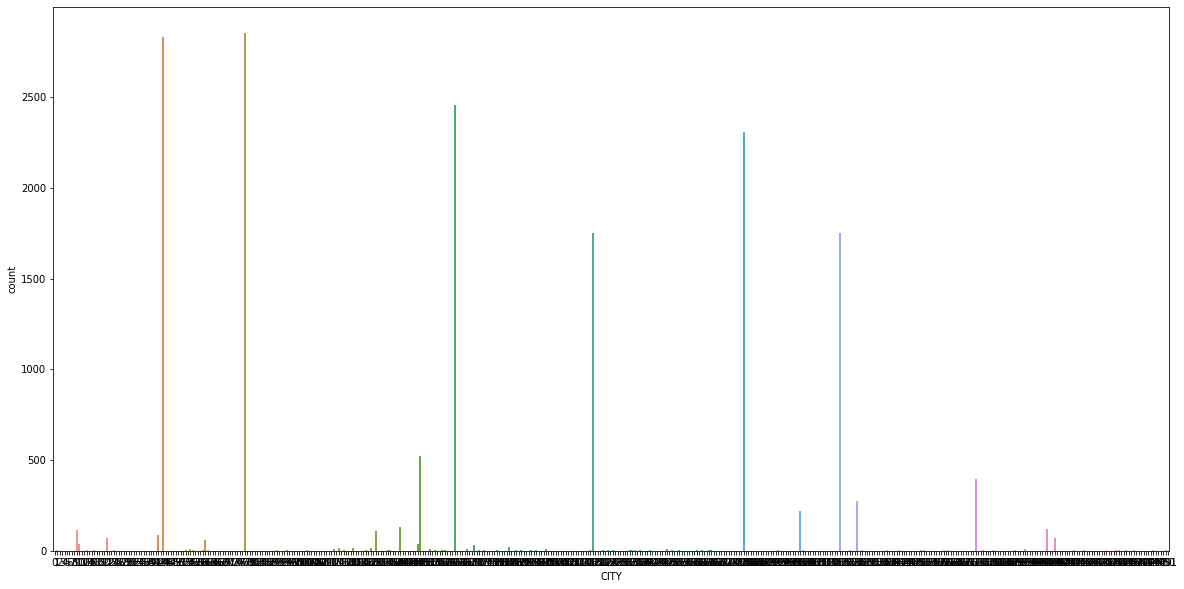

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(x='CITY',data=data)    # 77 has maximum count for city
print(data.CITY.value_counts())

3801    532
2850    526
2946    501
1893    286
1212    214
       ... 
1752      1
1736      1
3753      1
3737      1
2023      1
Name: CUISINES, Length: 4155, dtype: int64


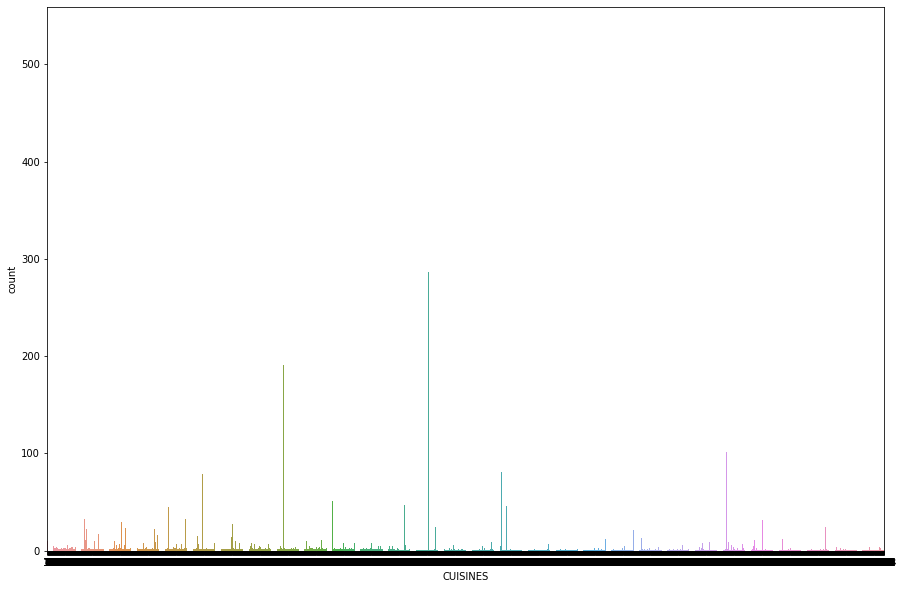

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(x='CUISINES',data=data)
print(data.CUISINES.value_counts())

397     216
501     187
565     175
676     171
719     169
       ... 
1224      1
1192      1
1160      1
1144      1
0         1
Name: LOCALITY, Length: 1638, dtype: int64


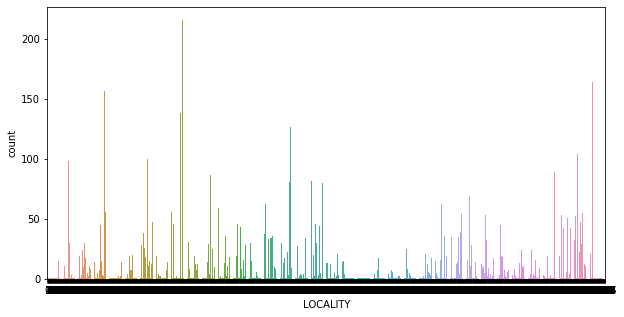

In [47]:
plt.figure(figsize=(10,5))           # maximum count for locality is 216
sns.countplot(x='LOCALITY',data=data)
print(data.LOCALITY.value_counts())

4634     8
7264     8
7745     7
4058     7
12747    7
        ..
15309    1
13260    1
3019     1
970      1
0        1
Name: RESTAURANT_ID, Length: 15574, dtype: int64


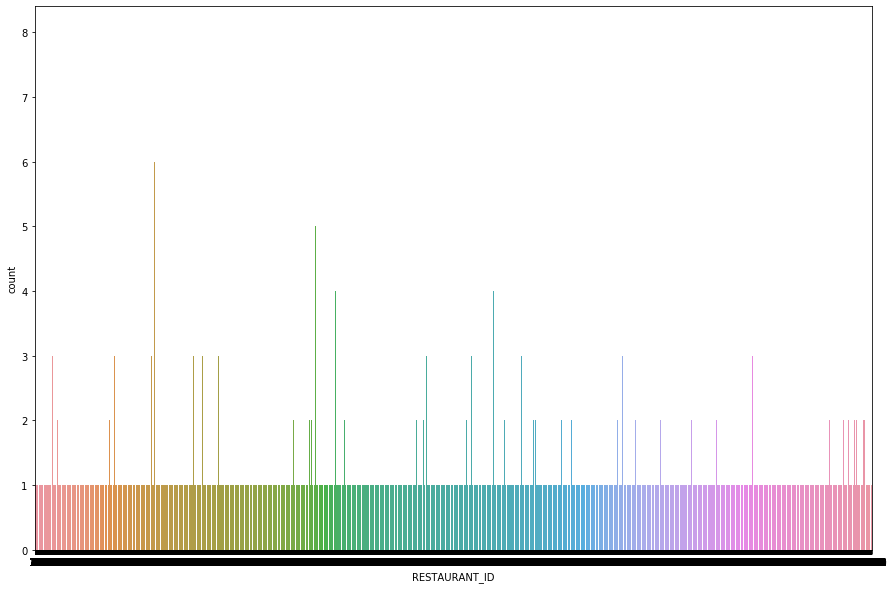

In [48]:
plt.figure(figsize=(15,10))           # 4634 and 7264 id's has maximum count of 8
sns.countplot(x='RESTAURANT_ID',data=data)
print(data.RESTAURANT_ID.value_counts())

Bivariate Analysis

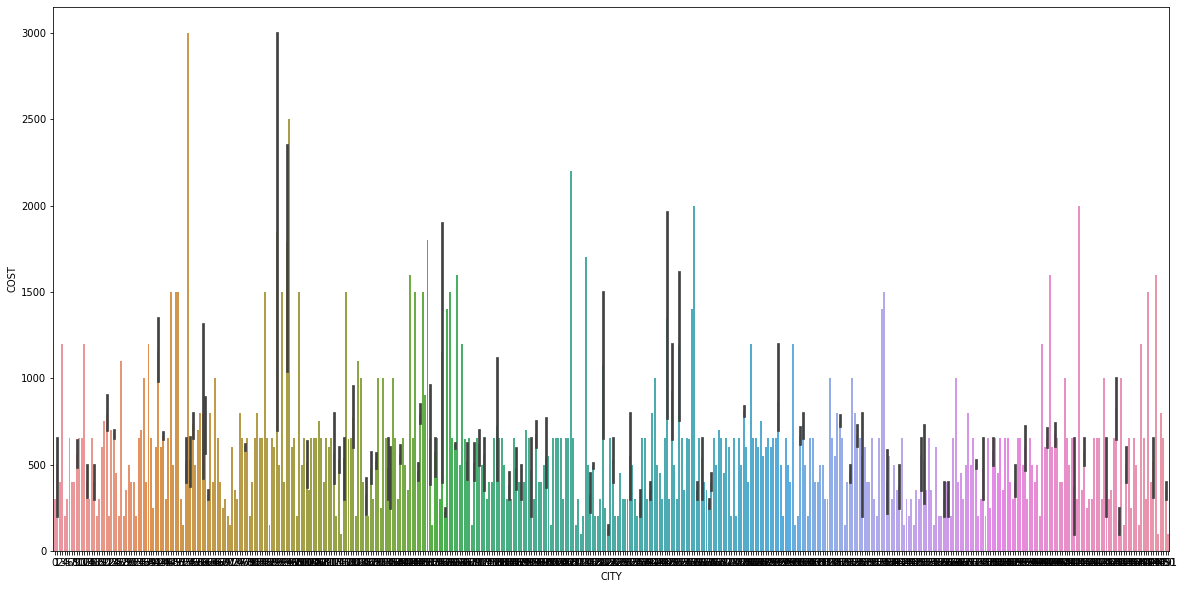

CITY  COST       
0     300.000000     1
1     655.252246     2
      200.000000     1
2     400.000000     1
3     1200.000000    1
                    ..
448   800.000000     1
449   655.252246     1
450   300.000000     1
      400.000000     1
451   100.000000     1
Name: COST, Length: 1247, dtype: int64


In [49]:
plt.figure(figsize=(20,10))            # Checking cost city-wise
sns.barplot(x='CITY',y='COST',data=data)
plt.show()
print(data.groupby('CITY')['COST'].value_counts())

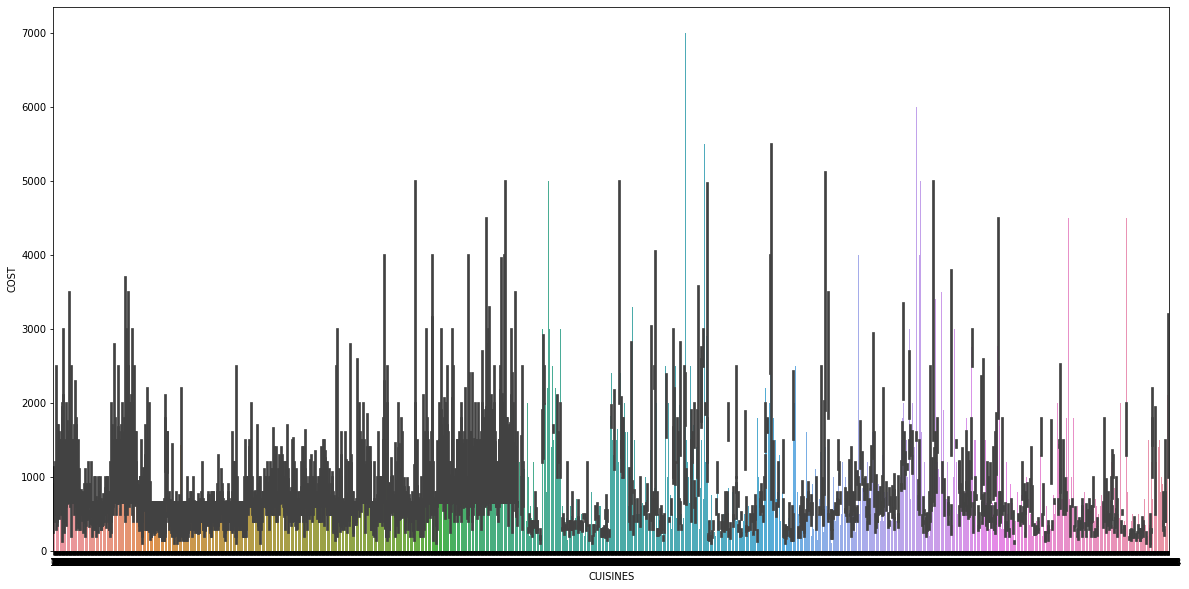

CUISINES  COST       
0         250.000000     1
          655.252246     1
1         655.252246     1
          900.000000     1
2         500.000000     2
                        ..
4150      1000.000000    1
4151      500.000000     1
4152      500.000000     1
4153      250.000000     1
4154      400.000000     1
Name: COST, Length: 8711, dtype: int64


In [50]:
plt.figure(figsize=(20,10))                 # Checking cost as per cuisines
sns.barplot(x='CUISINES',y='COST',data=data)
plt.show()
print(data.groupby('CUISINES')['COST'].value_counts())

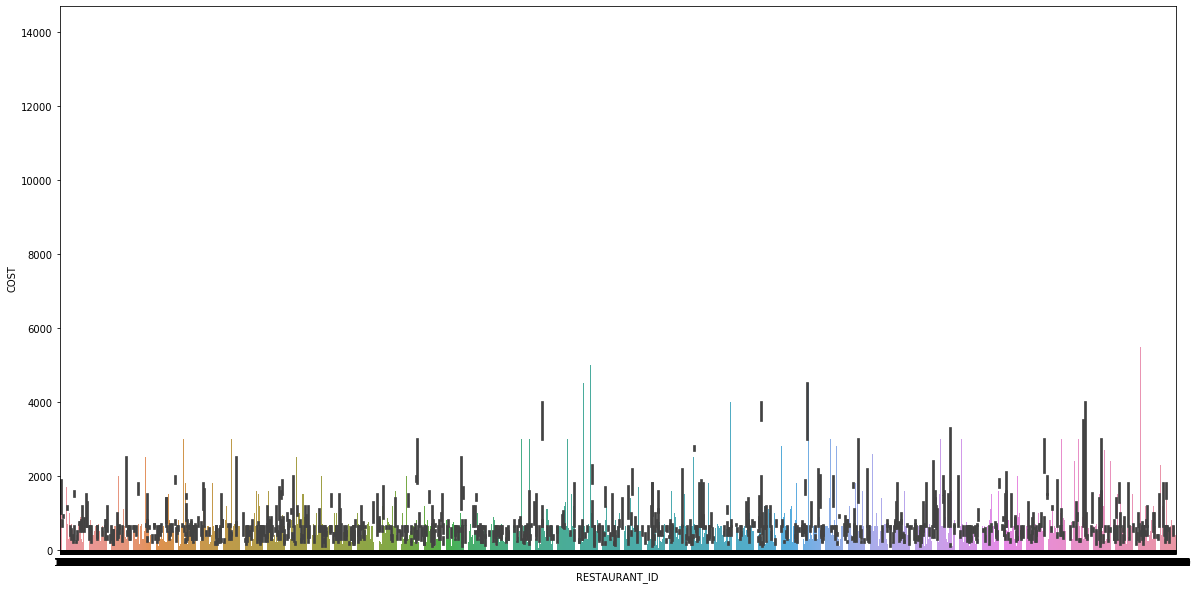

RESTAURANT_ID  COST       
0              1900.000000    1
1              500.000000     1
2              1100.000000    1
3              655.252246     1
4              800.000000     1
                             ..
15569          300.000000     1
15570          655.252246     1
15571          400.000000     1
15572          655.252246     1
15573          500.000000     1
Name: COST, Length: 16556, dtype: int64


In [51]:
plt.figure(figsize=(20,10))
sns.barplot(x='RESTAURANT_ID',y='COST',data=data)
plt.show()
print(data.groupby('RESTAURANT_ID')['COST'].value_counts())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001398963EC8>,
      dtype=object)

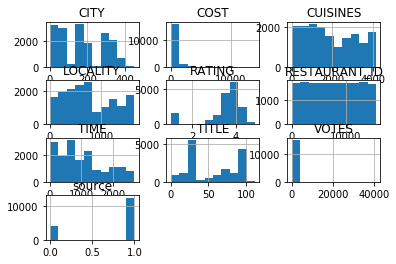

In [52]:
data.hist()                # histograph for dataset

# after removing outliers, there is no data left, so skipping this step
applying power tranformation/ Yeo Johnshon method to make data Normal like¶


In [53]:
from sklearn.preprocessing import power_transform    #Tranforming data
print(power_transform(data,method='yeo-johnson'))

[[-0.70582803  0.44019033  0.66592702 ... -0.83622176  1.277049
   0.57741851]
 [-0.63444924  1.14332327 -1.52182299 ... -1.17186856  1.61247917
   0.57741851]
 [-0.70582803  0.72482881  0.89056778 ...  0.21457698  0.65851186
   0.57741851]
 ...
 [ 0.64214061  0.27628371 -0.97579794 ... -0.78212419  0.34972341
  -1.73184611]
 [ 0.64214061 -0.17302197 -0.13403462 ...         nan  0.34972341
  -1.73184611]
 [ 0.64214061 -1.18791864 -0.48509673 ... -0.66263917  0.34972341
  -1.73184611]]


In [54]:
from sklearn.preprocessing import MinMaxScaler       # scaling data using MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(data))
print(scaler.transform(data))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[2.76785714e-01 6.06048931e-01 6.32402504e-01 ... 1.11696574e-03
  8.44062947e-02 1.00000000e+00]
 [2.94642857e-01 8.47492455e-01 6.95714974e-02 ... 6.55610325e-04
  1.05865522e-01 1.00000000e+00]
 [2.76785714e-01 7.00892570e-01 7.16417910e-01 ... 5.29344632e-03
  5.57939914e-02 1.00000000e+00]
 ...
 [6.69642857e-01 5.53329481e-01 1.63456909e-01 ... 1.21409319e-03
  4.54400748e-02 0.00000000e+00]
 [6.69642857e-01 4.16425865e-01 3.70967742e-01 ...            nan
  4.54400748e-02 0.00000000e+00]
 [6.69642857e-01 1.55461375e-01 2.75637939e-01 ... 1.45691183e-03
  4.54400748e-02 0.00000000e+00]]


In [55]:
import numpy as np

Checking and removing skewness

In [56]:
data.skew()          # Checking Skewness

TITLE             0.022361
RESTAURANT_ID     0.006775
CUISINES          0.213905
TIME              0.616982
CITY              0.239753
LOCALITY          0.358353
RATING           -1.867870
VOTES            12.385436
COST              4.594323
source           -1.154530
dtype: float64

In [57]:
# Removing Skewness-- Using for loop skewness is not removed that much so removing it separately

In [58]:
data['VOTES']=np.cbrt(data['VOTES'])

In [59]:
data['COST']=np.cbrt(data['COST'])

In [60]:
data['COST']=np.cbrt(data['COST'])

In [61]:
data['RATING']=np.sqrt(data['RATING'])

In [62]:
np.isnan(data.any()) #and gets False
np.isfinite(data.all()) #and gets True

TITLE            True
RESTAURANT_ID    True
CUISINES         True
TIME             True
CITY             True
LOCALITY         True
RATING           True
VOTES            True
COST             True
source           True
dtype: bool

In [63]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [64]:
np.isnan(data.any())

TITLE            False
RESTAURANT_ID    False
CUISINES         False
TIME             False
CITY             False
LOCALITY         False
RATING           False
VOTES            False
COST             False
source           False
dtype: bool

In [65]:
np.isfinite(data.all())

TITLE            True
RESTAURANT_ID    True
CUISINES         True
TIME             True
CITY             True
LOCALITY         True
RATING           True
VOTES            True
COST             True
source           True
dtype: bool

In [66]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              4
VOTES            1606
COST                0
source              0
dtype: int64

In [67]:
data.drop(['RATING'],axis=1,inplace=True)   # Dropping columns beacuse it affecting training data
data.drop(['VOTES'],axis=1,inplace=True)

In [68]:
train=data.loc[data['source']==1]       # Separating train & test from source values 
test=data.loc[data['source']==0]

In [69]:
train.drop(['source'],axis=1,inplace=True)    # dropping source from train data

In [70]:
train.shape                                  # Checking shape of train

(12690, 7)

 Separating x and y

In [71]:
x=train.drop(['COST'],axis=1)          # dropping cost from train data

In [72]:
x.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY
0,31,9438,2627,739,402,330
1,33,13198,289,1885,77,1216
2,31,10915,2976,661,77,1274
3,95,6346,4130,275,279,163
4,50,15387,1766,615,279,711


In [73]:
y=train['COST']
y

0        2.198524
1        2.253715
2        2.101675
3        2.101675
4        1.884672
           ...   
12685    1.994737
12686    2.299836
12687    2.218164
12688    1.945888
12689    2.035558
Name: COST, Length: 12690, dtype: float64

In [74]:
test.drop(['COST','source'],axis=1,inplace=True)  # Dropping cost and source from test

In [75]:
from sklearn.preprocessing import StandardScaler       # scaling data by StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.86888688,  0.37269233,  0.32540837, -0.58465845,  2.08867967,
        -0.91385137],
       [-0.80783894,  1.20737672, -1.61638078,  0.93436872, -0.91638181,
         1.00384047],
       [-0.86888688,  0.70057234,  0.61526483, -0.68804774, -0.91638181,
         1.12937786],
       ...,
       [ 0.35207201,  0.74896628, -0.12224961, -0.057108  ,  1.16404537,
         1.72676267],
       [-0.86888688, -0.36076439,  1.055448  ,  0.87074455, -0.91638181,
        -0.06539177],
       [-0.86888688, -0.29505519,  0.59034881, -0.4574101 , -0.13044266,
         1.70728273]])

Building models

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [77]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
knn=KNeighborsRegressor()

In [78]:
models = []
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
models.append(('KNeighborsRegressor',knn))

In [79]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)


In [80]:
Model = []
score = []

for name,model in models:
    print("**********",name,'**************')
    print('\n')
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    r2_scr=r2_score(y_test,pre)
    print("r2_score corresponding to random state is" ,r2_scr)
    print("Absolute error is", np.abs(mean_squared_error(y_test,pre)))   
    print('\n')
    print("RMSE is", np.sqrt(mean_squared_error(y_test,pre)))

********** LinearRegression **************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
r2_score corresponding to random state is 0.1502716234172593
Absolute error is 0.02219093215547951


RMSE is 0.14896621145575098
********** DecisionTreeRegressor **************


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
r2_score corresponding to random state is 0.46761119748887525
Absolute error is 0.013903506252637149


RMSE is 0.11791313011126942
********** RandomForestRegressor **************


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_fe

In [81]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [82]:
from sklearn.model_selection import GridSearchCV
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 0.001}

In [83]:
lsreg=Lasso(alpha=0.01)
lsreg.fit(x_train,y_train)
pre=lsreg.predict(x_test)
r2_scr=r2_score(y_test,pre)
print("r2_score corresponding to random state is" ,r2_scr)
print('\n')
print("RMSE is", np.sqrt(mean_squared_error(y_test,pre)))


r2_score corresponding to random state is 0.14179977316480274


RMSE is 0.14970697135599104


In [84]:
rreg=Ridge()
parameters=parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 0.001}

In [85]:
rreg=Ridge(alpha=0.001)
rreg.fit(x_train,y_train)
pre=rreg.predict(x_test)
r2_scr=r2_score(y_test,pre)
print("r2_score corresponding to random state is" ,r2_scr)
print("RMSE is", np.sqrt(mean_squared_error(y_test,pre)))

r2_score corresponding to random state is 0.1502716243809109
RMSE is 0.1489662113712819


In [86]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for regression",cross_val_score(rfr,x_train,y_train,cv=5,scoring="r2").mean())
print("Standard Deviation for linear regression",cross_val_score(rfr,x_train,y_train,cv=5,scoring="r2").std())


Mean r2 score for linear regression 0.7127771601751745
Standard Deviation for linear regression 0.016333653073442277


In [87]:
from xgboost import XGBRegressor

In [88]:
xgb = XGBRegressor(n_jobs=4)
xgb.fit(x_train, y_train, verbose=True)
xgb_pre=xgb.predict(x_test)
r2_scr=r2_score(y_test,xgb_pre)
print("r2 score",r2_scr*100)
print("RMSE is", np.sqrt(mean_squared_error(y_test,xgb_pre)))
print("MAE is",np.abs(mean_absolute_error(y_test,xgb_pre)))

r2 score 71.67065655050783
RMSE is 0.08601337061915021
MAE is 0.06682003628442097


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
r2_scr=r2_score(y_test,xgb_pre)
print("r2 score",r2_scr*100)
print("RMSE is", np.sqrt(mean_squared_error(y_test,xgb_pre)))
print("MAE is",np.abs(mean_absolute_error(y_test,xgb_pre)))

r2 score 71.67065655050783
RMSE is 0.08601337061915021
MAE is 0.06682003628442097


In [90]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor(n_estimators=700)
br.fit(x_train,y_train)
br_pred=br.predict(x_test)
r2_scr=r2_score(y_test,br_pred)
print("r2 score",r2_scr*100)
print("RMSE is", np.sqrt(mean_squared_error(y_test,br_pred)))
print("MAE is",np.abs(mean_absolute_error(y_test,br_pred)))

r2 score 70.97241835317939
RMSE is 0.08706691159772674
MAE is 0.06722246139708597


In [93]:
from sklearn.externals import joblib   # saving model
joblib.dump(xgb,'xgbRestaurant.obj')

['xgbRestaurant.obj']

Conclusion: Predicting COST for restaurant dataset CITY, LOCALITY, CUISINES, TIME,TITLE has more impact on target variable.
            I have applied all regressor models, cross-validation technique,ensemble methods. xgboost regressor working good               with accuracy of 72%.
            I have saved model with xgboost regressor.